# Venn Tree Scanner prototype

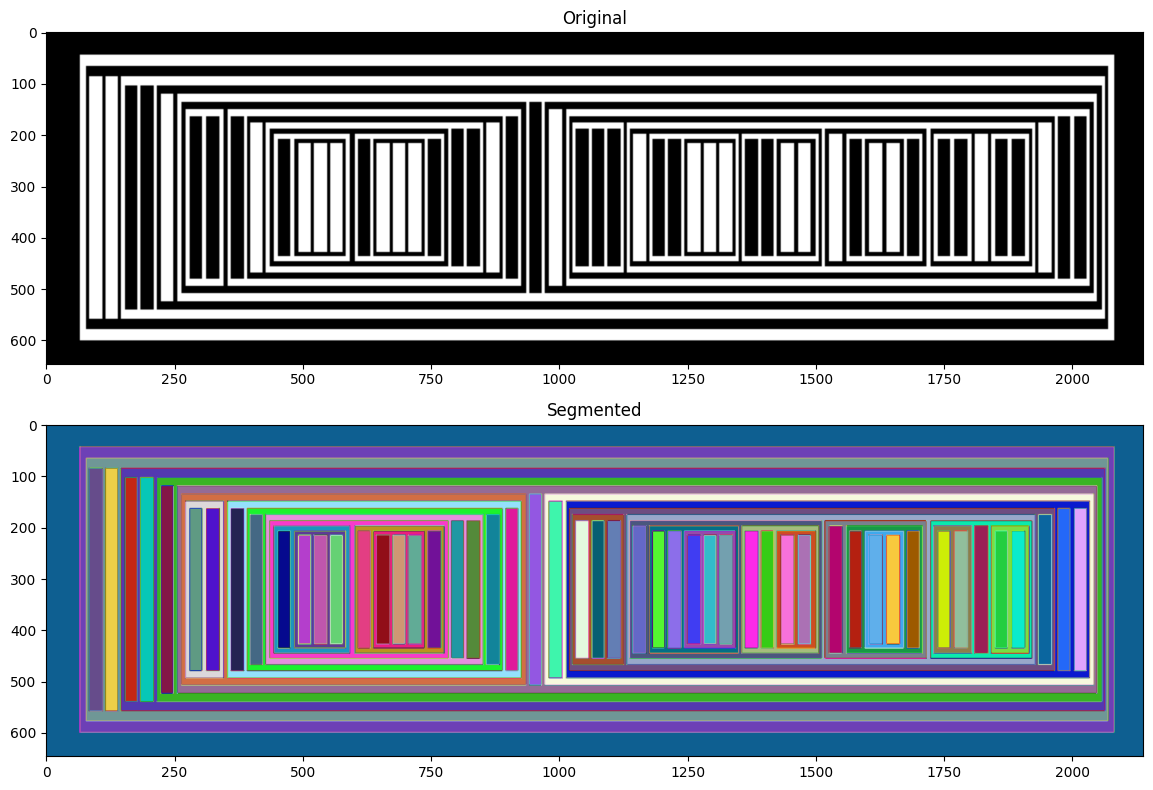

Image dimensions (y,x): (646, 2138)
# Classes: 1006


In [8]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import skimage
from skimage.color import rgb2gray

RED =   [1.,0.,0.]
GREEN = [0.,1.,0.]
BLUE =  [0.,0.,1.]

def draw_circle(image, point, color=RED, size=3):
    rr, cc = skimage.draw.disk(point, size, shape=image.shape)
    image[rr, cc] = color

def color_at(image, point):
    return image[point[0],point[1]]

def color_eq(c1, c2):
    return all(c1 == c2)

def color_close(c1, c2, tolerance=.1):
    #dist = np.sum((np.array(c1[:3] - c2[:3], dtype=float))**2)
    dist = np.linalg.norm(c1[:3]-c2[:3])
    # We are using RGB. Max distance is black vs white, 255
    # Therefore the max euclidean distance is:
    # sqrt((255^2)*3) = sqrt(195,075) = 441.673
    rel_dist = dist / 441.673
    assert rel_dist <= 1

    return rel_dist < tolerance

def show(original, segmented):
    fig, axes = plt.subplots(2, 1, figsize=(16, 8))
    ax = axes.ravel()
    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(segmented)
    ax[1].set_title("Segmented")
    fig.tight_layout()
    plt.show()

#original = io.imread("examples/helloworldblurred.png")
original = io.imread("examples/helloworld.png")

##################################### 
### Segmenting image
##################################### 

# Create a matrix with the same size as the 
# original image, then color-segment the image
# assigning an incrementally new number to each
# segment. 
segmented = np.zeros(original.shape[:2], dtype=int)
cols = np.zeros(original.shape)

last_class_used = 0
for y in range(segmented.shape[0]):
    for x in range(segmented.shape[1]):
        if segmented[y][x] == 0:
            # New class!
            last_class_used += 1
            last_color_used = np.random.rand(4,)
            last_color_used[3] = 1

            segmented[y][x] = last_class_used
            cols[y][x] = last_color_used
            frontier = set([(y,x)])
            while len(frontier) > 0:
                pixpos = frontier.pop()
                for dx in [-1,0,1]:
                    for dy in [-1,0,1]:
                        ppy = pixpos[0]+dy
                        ppx = pixpos[1]+dx
                        if (ppy >= 0 and ppy < segmented.shape[0] and 
                            ppx >= 0 and ppx < segmented.shape[1] and
                            segmented[ppy,ppx] == 0 and # excluding also the pixel under analysis
                            #color_eq(original[pixpos[0]][pixpos[1]],original[ppy][ppx])):
                            color_close(original[pixpos[0]][pixpos[1]],original[ppy][ppx])):
                            segmented[ppy][ppx] = last_class_used
                            cols[ppy][ppx] = last_color_used
                            frontier.add((ppy,ppx))


# original = original[:,:,:3]
# grayscale = rgb2gray(original)
# imgY, imgX = grayscale.shape # scikit uses [Y, X, Channel] representation
# img = np.repeat(grayscale[:, :, np.newaxis], 3, axis=2) # Duplicating grayscale

show(original, cols)
print(f"Image dimensions (y,x): {segmented.shape}")
print(f"# Classes: {last_class_used}")

In [11]:
print(segmented)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
